In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ase.build import bulk
from dask.distributed import Client

from abtem import FrozenPhonons, Probe, Potential, PlaneWave

from abtem import config
config.set({'device': 'cpu'})
config.set({'dask.lazy': True})
config.set({'fft': 'mkl'})
config.set({'fftw.threads': 1})

Runtime: 2.0 s per frozen phonon on 8-core Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz

In [2]:
client = Client()

/opt/anaconda3/envs/abtem-dask/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56834 instead
  warnings.warn(


In [33]:
silicon = bulk('Si', crystalstructure='diamond', cubic=True)
silicon *= (2,2,10)

In [34]:
frozen_phonons = FrozenPhonons(silicon, 2, {'Si':.0})

potential = Potential(frozen_phonons, 
                      gpts=512,
                      projection='infinite', 
                      slice_thickness=.5)

wave = PlaneWave(energy=100e3)

In [35]:
measurement = wave.multislice(potential).diffraction_patterns().mean(0)

In [36]:
%%time
measurement.compute()

CPU times: user 51.6 ms, sys: 6.14 ms, total: 57.7 ms
Wall time: 853 ms


In [7]:
measurement.array.shape

(241, 241)

(<AxesSubplot:xlabel='Spatial frequency x [1 / Å]', ylabel='Spatial frequency y [1 / Å]'>,
 <matplotlib.image.AxesImage at 0x7f8db10aa340>)

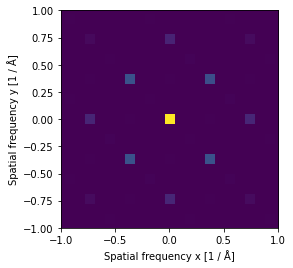

In [41]:
measurement.poisson_noise(total_dose=10000, samples=1000).std(0).show(max_angle=1)

(<AxesSubplot:xlabel='Spatial frequency x [1 / Å]', ylabel='Spatial frequency y [1 / Å]'>,
 <matplotlib.image.AxesImage at 0x7f8db0f1ef40>)

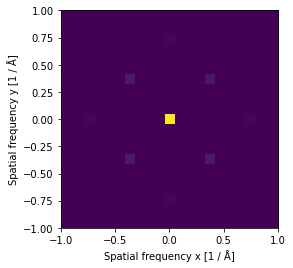

In [40]:
measurement.poisson_noise(total_dose=10000, samples=1000).mean(0).show(max_angle=1)

(<AxesSubplot:xlabel='Spatial frequency x [1 / Å]', ylabel='Spatial frequency y [1 / Å]'>,
 <matplotlib.image.AxesImage at 0x7fa34ef7ddc0>)

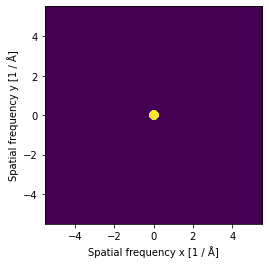

In [9]:
measurement.show()